# 대표적인 연속형 확률분포

In [419]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats, integrate
from scipy.optimize import minimize_scalar
from IPython.display import Image #주피터 노트북에 이미지 삽입
%precision 3
%matplotlib inline

In [420]:
from IPython.display import Image #주피터 노트북에 이미지 삽입

In [421]:
linestyles = ['-', '--', ':']

#기댓값에 대한 함수
def E(X, g=lambda x: x):
    x_range, f = X
    def integrand(x):
        return g(x) * f(x)
    return integrate.quad(integrand, -np.inf, np.inf)[0]

#분산에 대한 함수
def V(X, g=lambda x: x):
    x_range, f = X
    mean = E(X, g)
    def integrand(x):
        return (g(x) - mean) ** 2 * f(x)
    return integrate.quad(integrand, -np.inf, np.inf)[0]

#확률변수를 인수로 취하여 그 화귤ㄹ변수가 확률의 성질을 만족하는지 확인하고
#기댓값과 분산을 계산하여 반환하는 함수
def check_prob(X):
    x_range, f = X
    f_min = minimize_scalar(f).fun
    assert f_min >= 0, 'density function is minus value'
    prob_sum = np.round(integrate.quad(f, -np.inf, np.inf)[0], 6)
    assert prob_sum == 1, f'sum of probability is {prob_sum}'
    print(f'expected vaue {E(X):.3f}')
    print(f'variance {V(X):.3f}')

#확률변수와 구간을 인수로 취하고 그 확률변수의 밀도함수와 분포함수를 그리는 함수
def plot_prob(X, x_min, x_max):
    x_range, f = X
    def F(x):     #누적밀도함수
        return integrate.quad(f, -np.inf, x)[0]

    xs = np.linspace(x_min, x_max, 100)

    fig = plt.figure(figsize=(10, 6))
    ax = fig.add_subplot(111)
    ax.plot(xs, [f(x) for x in xs],
            label='f(x)', color='gray')
    ax.plot(xs, [F(x) for x in xs],
            label='F(x)', ls='--', color='gray')

    ax.legend()
    plt.show()

assert에 대하여..

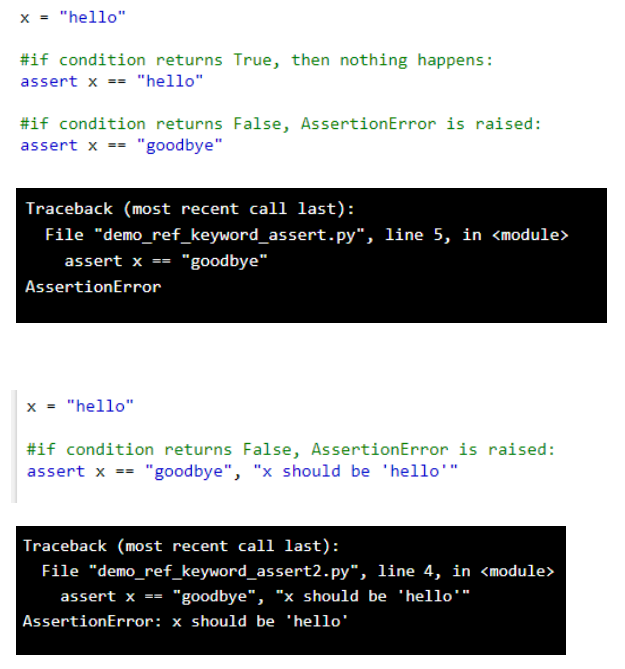

In [422]:
Image("capture_img/ch08_01.png")
# 예에서 확인하면 맞으면 hello 출력 , 틀리면 goodbye 출력
# 동작상에 문제가 있나 없나 그거를 알기위해

## 정규분포
- 파라미터 감마 = 평균
- 파라미터 오메가 제곱 = 분산
- N(감마, 오메가제곱) ==> 정규분포
- 변환한 확률분포도 정규분포를 따른다.

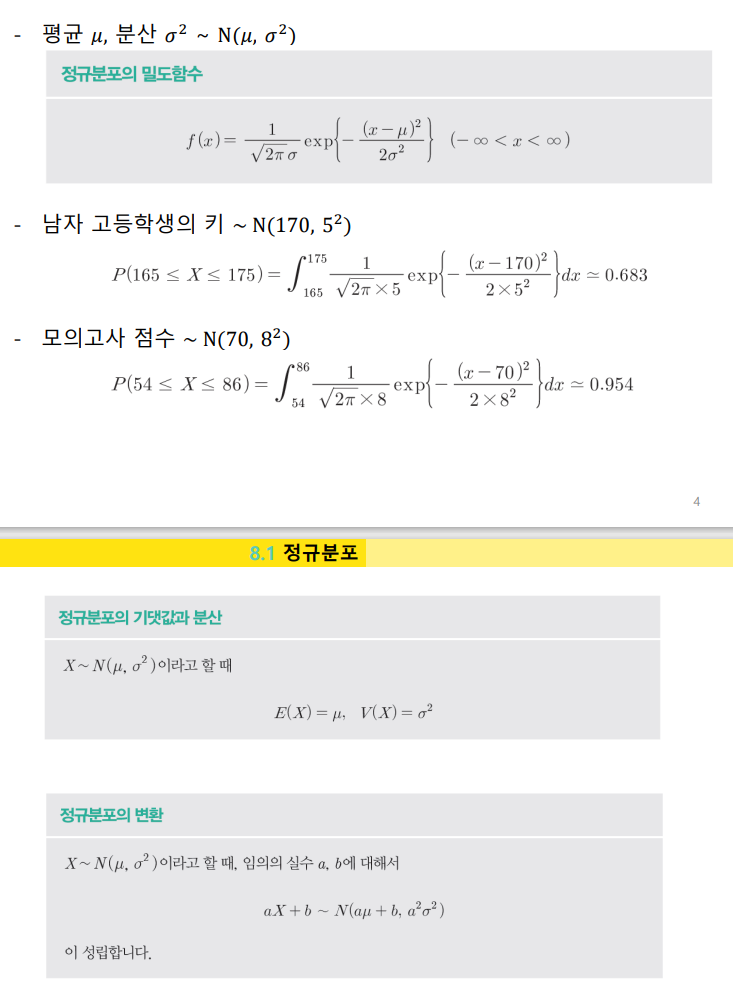

In [423]:
Image("capture_img/ch08_02.png")

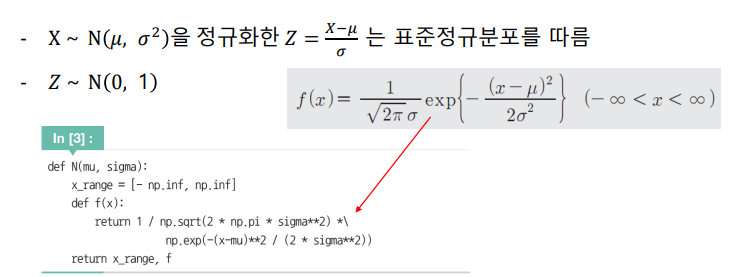

In [424]:
Image("capture_img/ch08_03.png")
# 표준정규분포를 따르는 확률변수를 Z라는 기호를 사용해보자
# 그것을 넘파이로 구현해보면 바로 아래 함수와 같다.

In [425]:
def N(mu, sigma):
    x_range = [- np.inf, np.inf]
    def f(x):
        return 1 / np.sqrt(2 * np.pi * sigma**2) *\
                    np.exp(-(x-mu)**2 / (2 * sigma**2))
    return x_range, f

In [426]:
# N(2, 0.5 ** 2)를 따르는 확률변수 X 를 작성해보자
mu, sigma = 2, 0.5
X = N(mu, sigma)

In [427]:
# 기댓값과, 분산을 계산해보자
check_prob(X)
# 기댓값은 2, 분산은 0.25가 나온다

expected vaue 2.000
variance 0.250


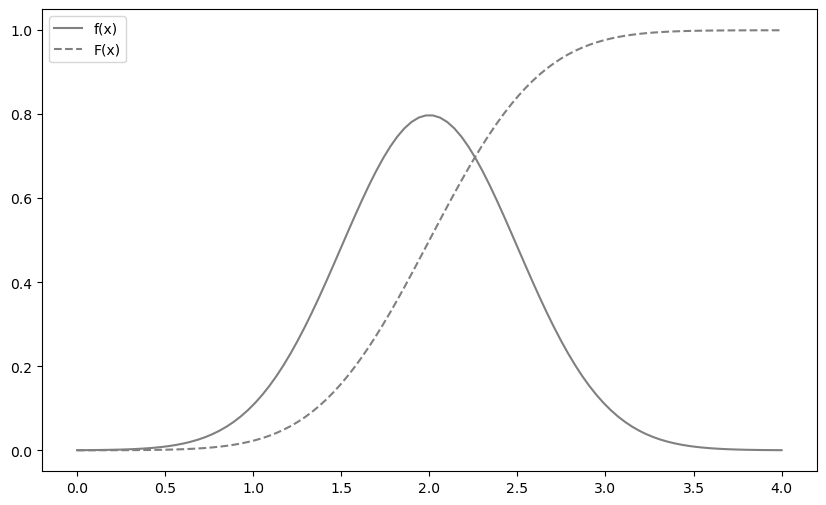

In [428]:
# 밀도함수와 분포함수를 0과 4사이의 구간에서 그려보자
plot_prob(X, 0, 4)
# 정규분포의 밀도함수는 좌우대칭인 종 모양이 된다.

In [429]:
# scipy.stats로 구현해보자
# norm 함수 => 정규분포를 따르는 확률변수, 첫번째 인수 기댓값, 두번쨰인수 표준편차

rv = stats.norm(2, 0.5)
# 기댓값이 2이고 표준편차가 0.5인 정규분표 따르는 확률변수를 생성완료

In [430]:
rv.mean(), rv.var()
# 위에서 생성된 확률변수의 기댓값과 분산을 구했다.

(2.000, 0.250)

In [431]:
rv.pdf(2)
# 밀도함수 구했다.

0.798

In [432]:
rv.cdf(1.7)
# 분포함수를 구했다.
# cdf 메서드를 사용하여 X가 1.7보다 작은 값이 되는 확률 P(X <= 1.7)을 구해보자

0.274

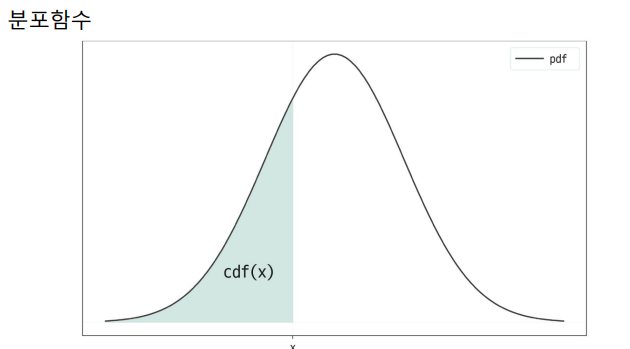

In [433]:
# 분포함수는 P(X <= x)를 계산하는 함수이므로 그림에서 색이 칠해진 영역의 면적을 구하는 것에 해당함
Image("capture_img/ch08_04.png")

In [434]:
# isf 메서드를 사용하여 상위 30% 점을 구해본다.ㄹ
rv.isf(0.3)

2.262

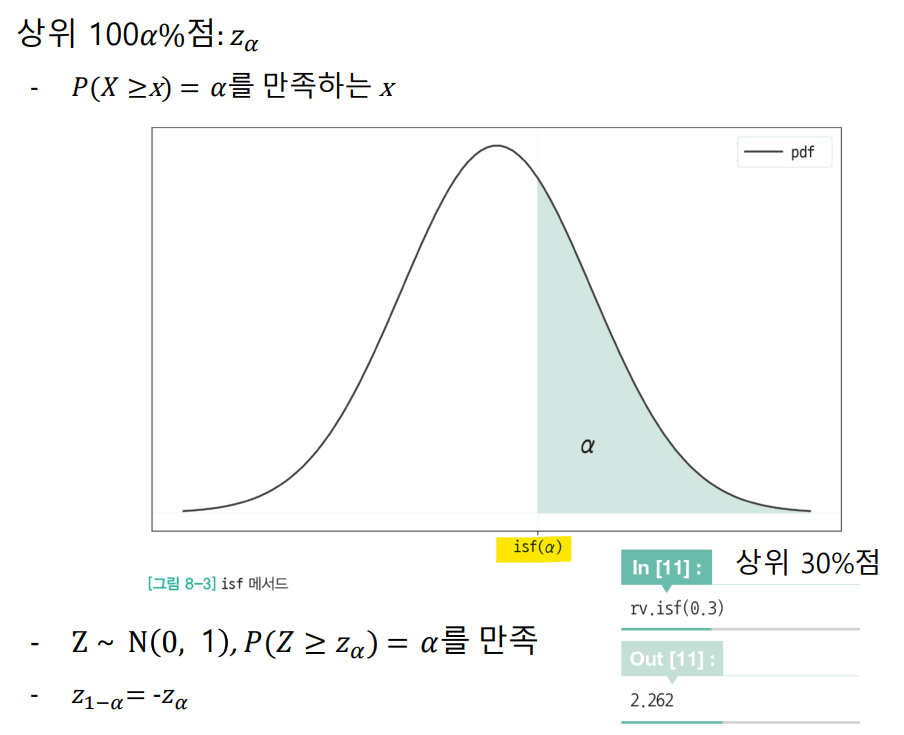

In [435]:
# isf 메서드 => 상위 100 알파 % 점을 구할 수 있다.
Image("capture_img/ch08_05.png")

In [436]:
# interval 메서드를 사용하여 90% 구간을 구해보자
rv.interval(0.9)

(1.178, 2.822)

In [437]:
# 양쪽에 5% 씩 남아있기 때문에 a, b를 다음 과 같이 구할 수 있다.
rv.isf(0.95), rv.isf(0.05)

(1.178, 2.822)

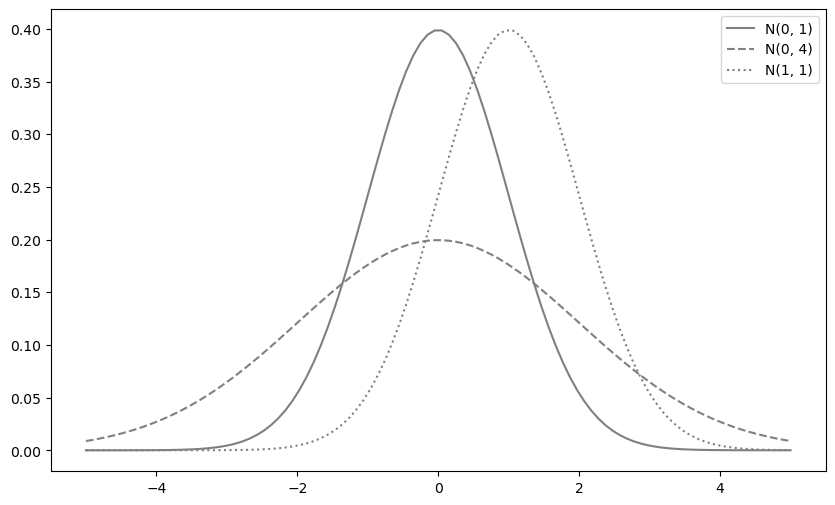

In [438]:
# 파라미터에 따라 정규분포의 형태가 어케 변화하는지 살펴보자
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)

xs = np.linspace(-5, 5, 100)
params = [(0, 1), (0, 2), (1, 1)]
for param, ls in zip(params, linestyles):
    mu, sigma = param
    rv = stats.norm(mu, sigma)
    ax.plot(xs, rv.pdf(xs),
            label=f'N({mu}, {sigma**2})', ls=ls, color='gray')
ax.legend()

plt.show()

# 오메가 제곱이 커짐에 따라 ㅂㄴ포가 넓어지고, 감마가 변화하면 분포 전체가 평행이동하는 것을 확인할 수 있다.

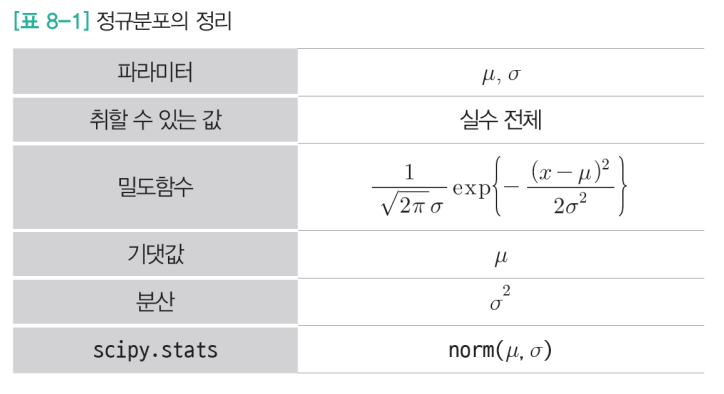

In [439]:
# 정규분포의 정리
Image("capture_img/ch08_06.png")

## 지수분포
- 어떤 사건이 발생하는 간격이 따르는 분포
- 파라미터 람다인 지수분포는 Ex(람다)
- 단위 시간당 평균 람다 번 발생하는 사건의 발생 간격을 따르는 확률분포
- 예제는 아래 사진과 같다.
- 지수분포의 기댓값과 분산은 아래 사진과 같다.

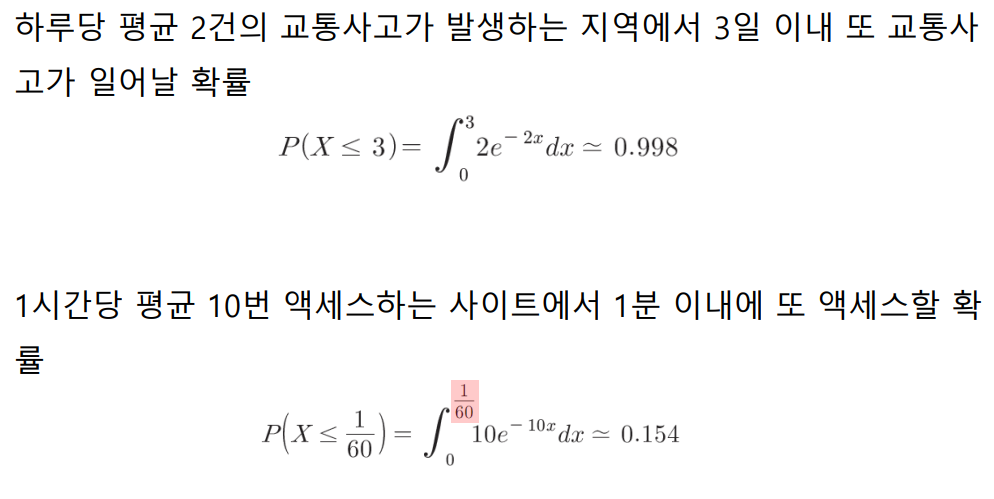

In [440]:
# 예제
Image("capture_img/ch08_07.png")

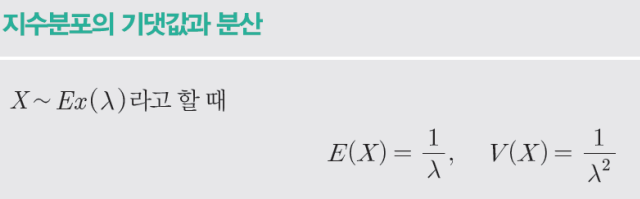

In [441]:
# 지수분포의 기댓값과 분산
Image("capture_img/ch08_08.png")

In [442]:
# 넘파이로 구현해보자!

def Ex(lam):
    x_range = [0, np.inf]
    def f(x):
        if x >= 0:
            return lam * np.exp(-lam * x)
        else:
            return 0
    return x_range, f

In [443]:
# Ex(3)을 따르는 확률변수 X를 생성해보자
lam = 3
X = Ex(lam)

In [444]:
check_prob(X)
# 기댓값은 1/3, 분산은 1/9이 된다

expected vaue 0.333
variance 0.111


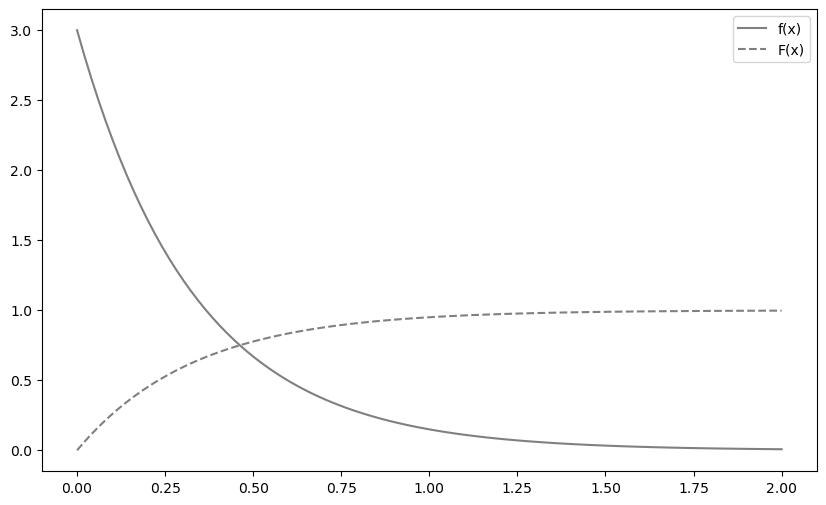

In [445]:
# 0과 2 사이의 구간에서 밀도함수와 분포함수를 그려보자
plot_prob(X, 0, 2)
# 지수분포의 밀도함수는 값이 커질수록 지수적으로 감소한다.

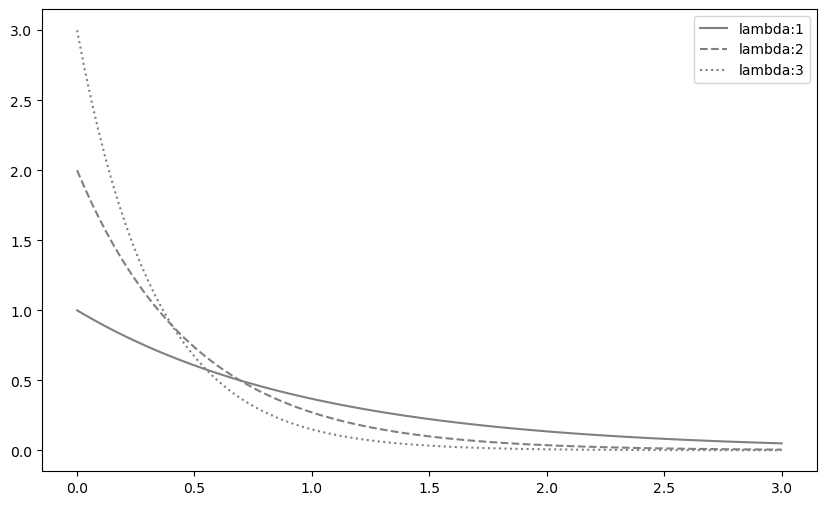

In [446]:
# scipy.stats에서는 지수분포를 따르는 확률변수를 expon 함수로 작성할 수 있다.
# 다만 파라미터는 인수 scale에 1/람다 형식으로 입력해야함

# 파라미터 람다를 1,2,3 으로 변화시켜 분포형태의 변화를 살펴보자
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)

xs = np.linspace(0, 3, 100)
for lam, ls in zip([1, 2, 3], linestyles):
    rv = stats.expon(scale=1/lam)
    ax.plot(xs, rv.pdf(xs),
            label=f'lambda:{lam}', ls=ls, color='gray')
ax.legend()

plt.show()
# 파라미터 값이 커짐에 따라 확률분포는 점점 감소함을 알 수 있다.

지수분포의 정리

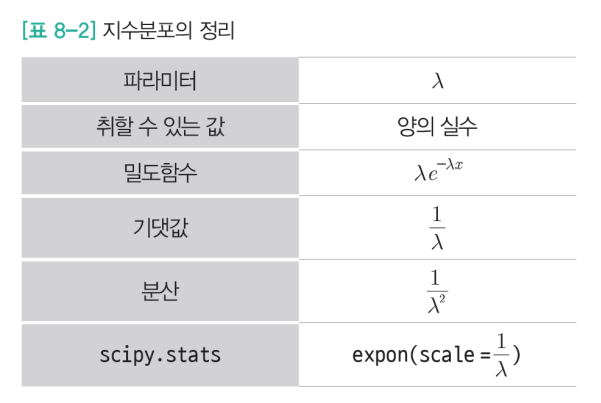

In [447]:
Image("capture_img/ch08_09.png")

## 카이제곱분포

- 챕터 10 이후에 설명하는 추정과 검정에 사용하는 특수한 확률분포
- 분산의 구간추정이나 독립성 검정에서 사용
- '어떠한 형태를 하고있다' 라고 결론이 나오는 편
- 아래 사진과 같이 정의됨 (독립적이라는 전제조건이 있음)

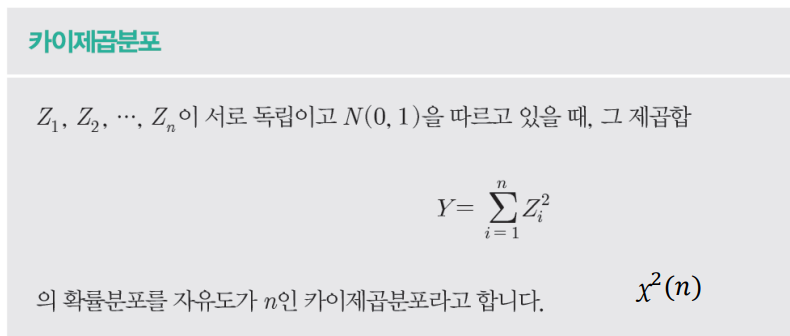

In [448]:
Image("capture_img/ch08_10.png")

In [449]:
# n=10일때의 카이제곱분포에서 무작위추출한 표본크기가 100만의 표본 데이터를 뽑아보자

n = 10
rv = stats.norm()
sample_size = int(1e6)
# 표준정규분포로부터 10×100만 사이즈로 무작위추출
Zs_sample = rv.rvs((n, sample_size))
# axis=0에서 총합을 구하고, 표준정규분포의 제곱합 표본 데이터를 구한다
chi2_sample = np.sum(Zs_sample**2, axis=0)

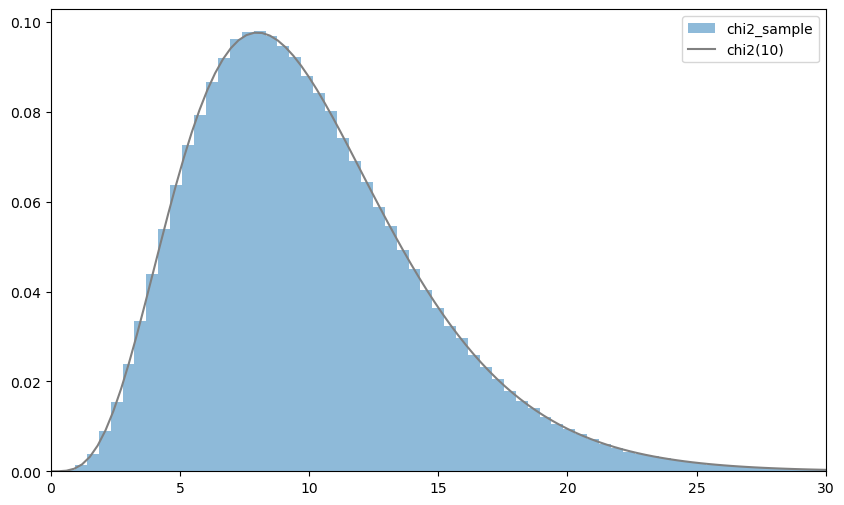

In [450]:
# scipy.stats에서 카이제곱분포를 따르는 확률변수를 만들어보자
# 표본데이터의 히스토그램과 밀도함수를 함께 그려보자

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)

rv_true = stats.chi2(n)
xs = np.linspace(0, 30, 100)
ax.hist(chi2_sample, bins=100, density=True,
        alpha=0.5, label='chi2_sample')
ax.plot(xs, rv_true.pdf(xs), label=f'chi2({n})', color='gray')

ax.legend()
ax.set_xlim(0, 30)
plt.show()

# 히스토그램과 밀도함수가 일치함을 확인 가능

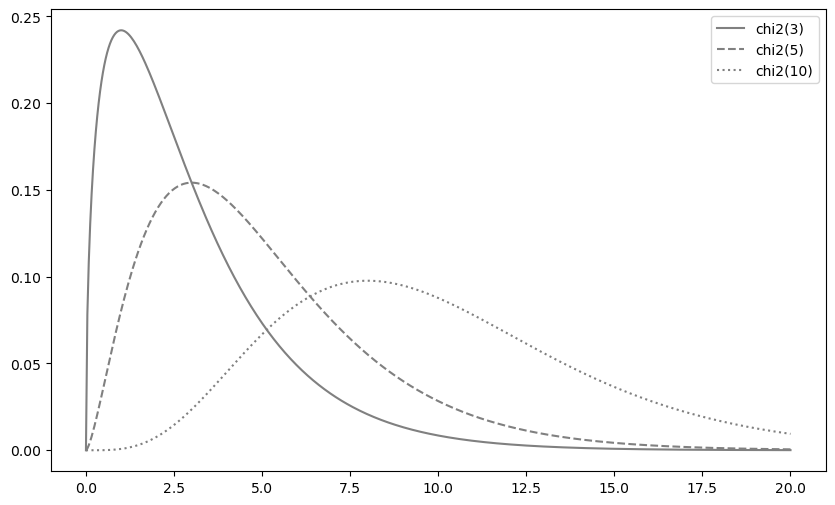

In [451]:
# 카이제곱분포가 자유도 n에 따라 어떠한 분포 형태가 되는지 살펴보자 

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)

xs = np.linspace(0, 20, 500)
for n, ls in zip([3, 5, 10], linestyles):
    rv = stats.chi2(n)
    ax.plot(xs, rv.pdf(xs),
            label=f'chi2({n})', ls=ls, color='gray')
    
ax.legend()
plt.show()

# 알수있는것
# - 좌우비대칭으로, 왼쪽으로 치우치고 오른쪽으로 넓어짐
# - 자유도가 커지면 좌우대칭에 가까워짐
# - 자유도의 값 가까이에 분포의 정점이 있음

In [452]:
rv = stats.chi2(5)
rv.isf(0.05)

11.070

카이제곱분포 정리

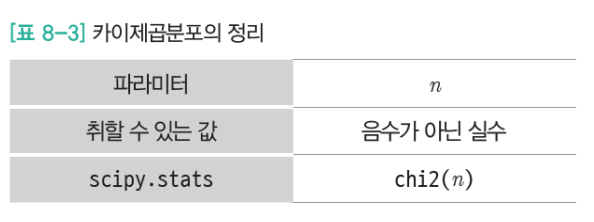

In [453]:
Image("capture_img/ch08_11.png")

## t분포
- 정규분포에서 모평균의 구간추정 등에 사용되는 확률분포
- 아래 사진과 같이 정의됨

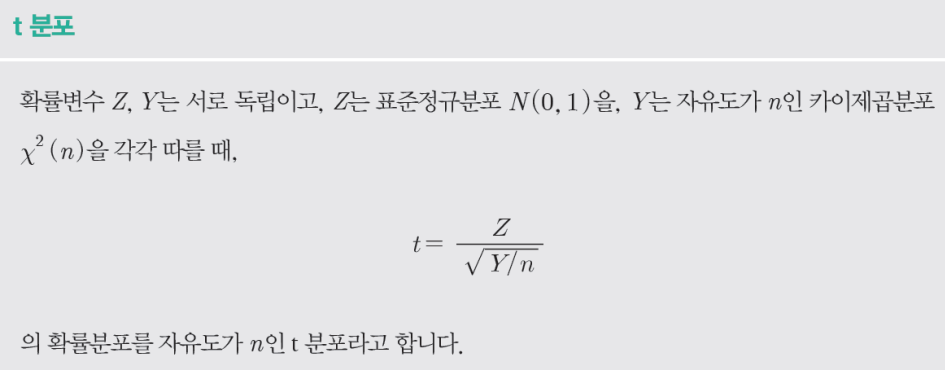

In [454]:
Image("capture_img/ch08_12.png")

In [455]:
n = 10
rv1 = stats.norm()
rv2 = stats.chi2(n)

sample_size = int(1e6)
Z_sample = rv1.rvs(sample_size)
chi2_sample = rv2.rvs(sample_size)

t_sample = Z_sample / np.sqrt(chi2_sample/n)

# 자유도가 10인 t분포가 생성됨

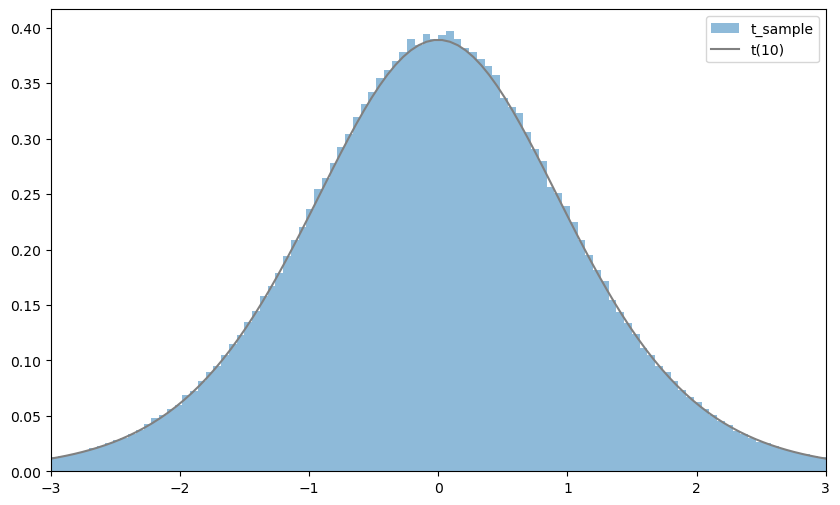

In [456]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)

rv = stats.t(n)
xs = np.linspace(-3, 3, 100)
ax.hist(t_sample, bins=100, range=(-3, 3),
        density=True, alpha=0.5, label='t_sample')
ax.plot(xs, rv.pdf(xs), label=f't({n})', color='gray')

ax.legend()
ax.set_xlim(-3, 3)
plt.show()

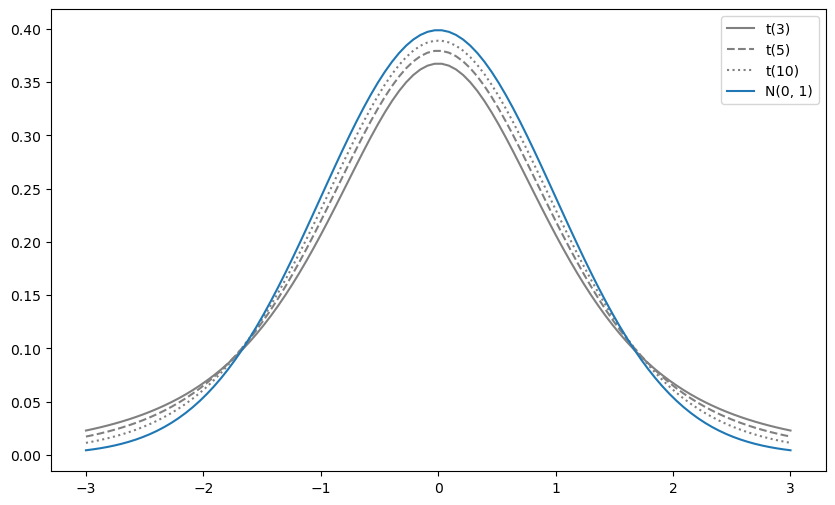

In [457]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)

xs = np.linspace(-3, 3, 100)
for n, ls in zip([3, 5, 10], linestyles):
    rv = stats.t(n)
    ax.plot(xs, rv.pdf(xs),
            label=f't({n})', ls=ls, color='gray')
rv = stats.norm()
ax.plot(xs, rv.pdf(xs), label='N(0, 1)')
    
ax.legend()
plt.show()

# 결론
# - 좌우대칭인 분포이다
# - 표준정규분포보다 양쪽 끝이 두껍다
# - 자유도가 커지면 표준정규분포에 가까워짐

In [458]:
rv = stats.t(5)
rv.isf(0.05)

2.015

t 분포의 정리

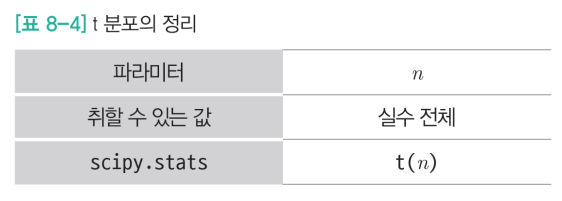

In [459]:
Image("capture_img/ch08_13.png")

## F분포
- 분산분석 등에서 사용되는 확률분포
- 아래 사진과 같이 정의됨

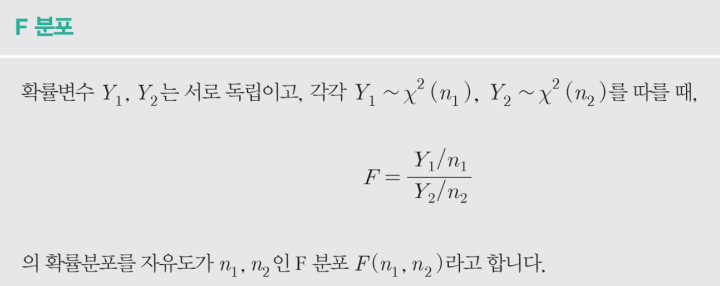

In [460]:
Image("capture_img/ch08_14.png")

In [461]:
n1 = 5
n2 = 10
rv1 = stats.chi2(n1)
rv2 = stats.chi2(n2)

sample_size = int(1e6)
sample1 = rv1.rvs(sample_size)
sample2 = rv2.rvs(sample_size)

f_sample = (sample1/n1) / (sample2/n2)

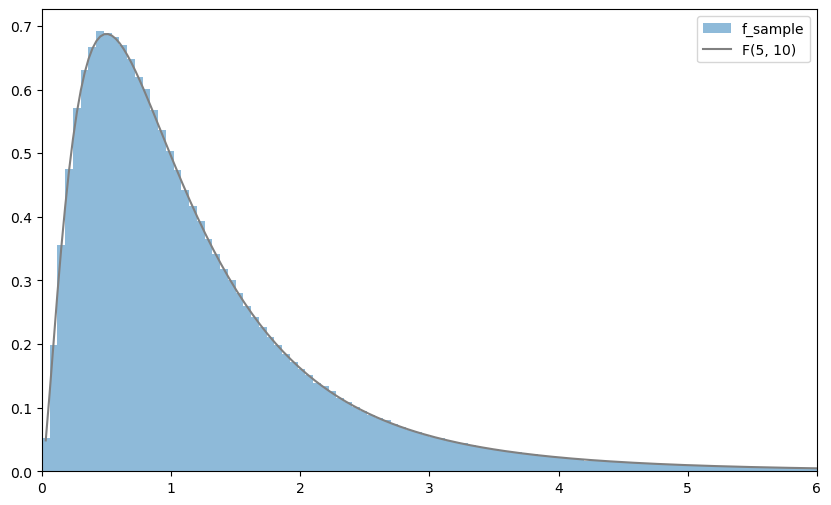

In [462]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)

rv = stats.f(n1, n2)
xs = np.linspace(0, 6, 200)[1:]
ax.hist(f_sample, bins=100, range=(0, 6),
        density=True, alpha=0.5, label='f_sample')
ax.plot(xs, rv.pdf(xs), label=f'F({n1}, {n2})', color='gray')

ax.legend()
ax.set_xlim(0, 6)
plt.show()

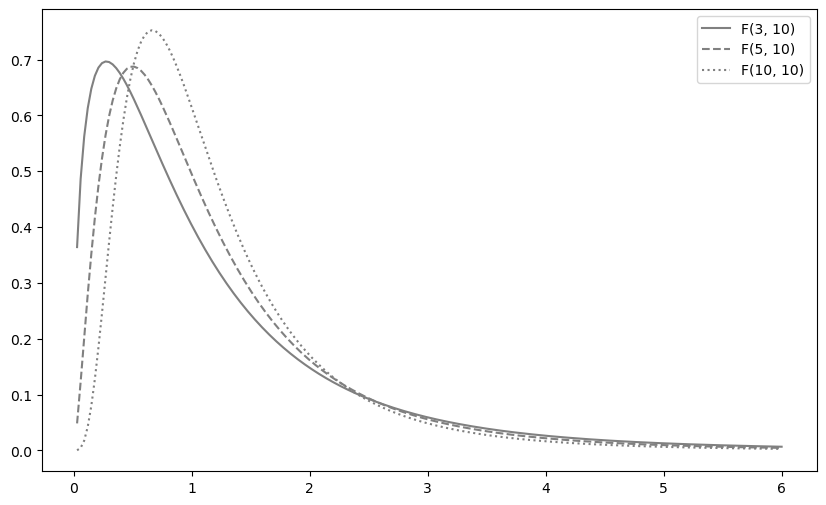

In [463]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)

xs = np.linspace(0, 6, 200)[1:]
for n1, ls in zip([3, 5, 10], linestyles):
    rv = stats.f(n1, 10)
    ax.plot(xs, rv.pdf(xs),
            label=f'F({n1}, 10)', ls=ls, color='gray')
    
ax.legend()
plt.show()

# 결론
# - 좌우비대칭으로 왼쪽으로 치우치고 오른쪽으로 넓어지는 분포이다
# - 분포의 정점은 1에 가깝다.

F 분포의 정리

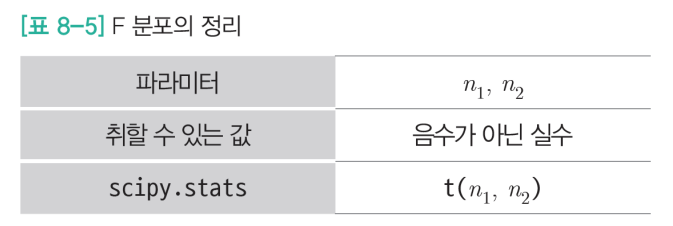

In [464]:
Image("capture_img/ch08_15.png")